In [2]:
# Dataframe
import matplotlib.pyplot as plt
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime
# text preprocessing
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import contractions
import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load('en', parse=True, tag=True, entity=True)
from sklearn.feature_extraction.text import CountVectorizer

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv(r'C:\Sem7\Final Year Project\DATASETS\Clean_Headphone_Dataset.csv')


In [ ]:
df.dtypes

Rating             int64
verified            bool
reviewerID        object
asin              object
reviewerName      object
unixReviewTime     int64
category          object
description       object
title             object
also_buy          object
brand             object
feature           object
rank              object
also_view         object
main_cat          object
similar_item      object
date              object
price             object
review_text       object
time              object
rating_class      object
clean_text        object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25188 entries, 0 to 25187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rating          25188 non-null  int64 
 1   verified        25188 non-null  bool  
 2   reviewerID      25188 non-null  object
 3   asin            25188 non-null  object
 4   reviewerName    25187 non-null  object
 5   unixReviewTime  25188 non-null  int64 
 6   category        25188 non-null  object
 7   description     25188 non-null  object
 8   title           25188 non-null  object
 9   also_buy        25188 non-null  object
 10  brand           25188 non-null  object
 11  feature         25188 non-null  object
 12  rank            25188 non-null  object
 13  also_view       25188 non-null  object
 14  main_cat        25188 non-null  object
 15  similar_item    23311 non-null  object
 16  date            24070 non-null  object
 17  price           18017 non-null  object
 18  review

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Text(0, 0.5, 'Number of Reviews')

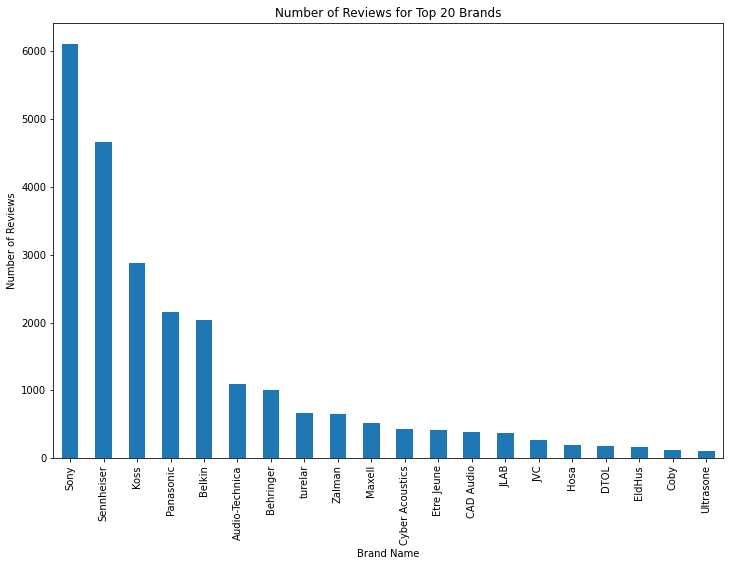

In [ ]:
## NUMBER OF REVIEWS FOR TOP 20 BRANDS 
brands = df["brand"].value_counts()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

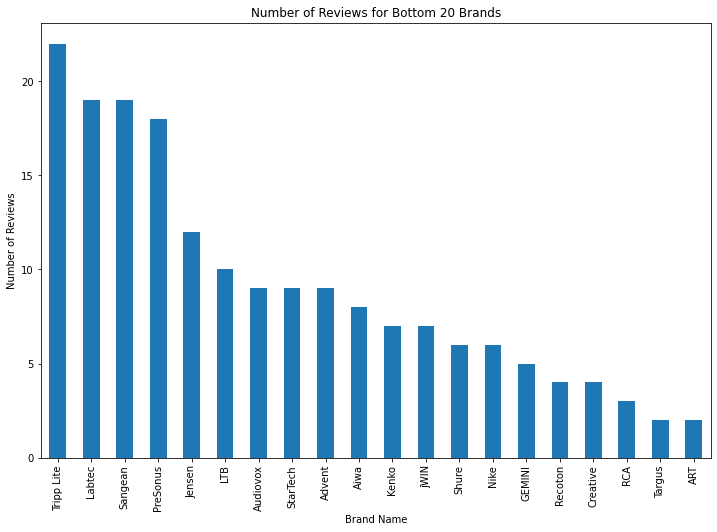

In [ ]:
brands = df["brand"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[-20:].plot(kind='bar')
plt.title("Number of Reviews for Bottom 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

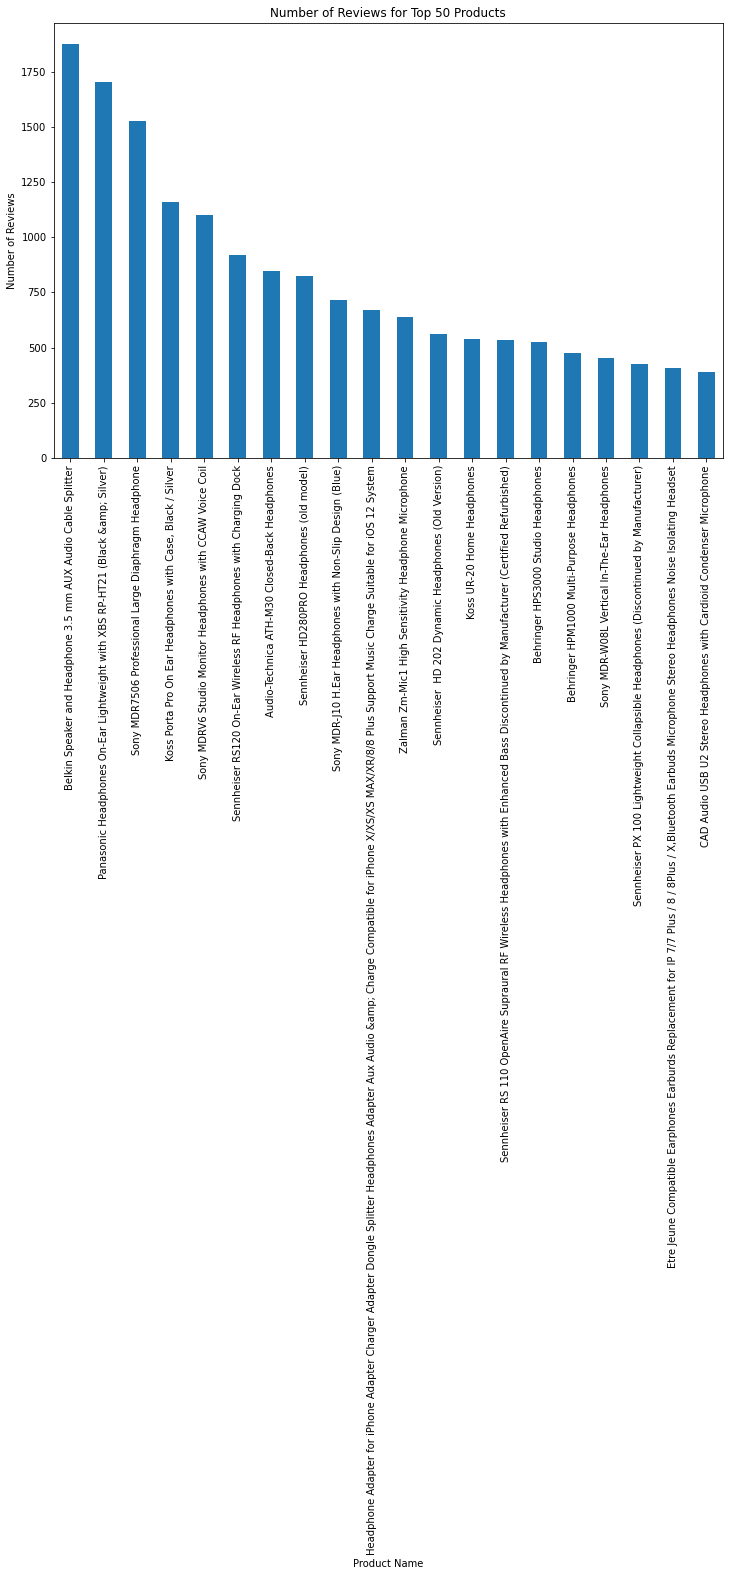

In [ ]:
##########################################
## PLOT NUMBER OF REVIEWS FOR TOP 20 PRODUCTS  
##########################################

products = df["title"].value_counts()
plt.figure(figsize=(12,8))
products[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df = df.drop('time', axis = 1)
df.head(3)

,Rating,verified,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,also_buy,...,rank,also_view,main_cat,similar_item,date,price,review_text,rating_class,clean_text,year
0,5,True,A38RQFVQ1AKJQQ,4126895493,George Walker,1424563200,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$7.99,Five Stars Great headphones. It's just the cor...,good,five star great headphones cord short,2015
1,5,True,A299MRB9O6GWDE,4126895493,Carolyn B,1494201600,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$7.99,Officewear Really like these headphone. Wante...,good,officewear really like headphone want somethin...,2017
2,1,True,A3ACFC6DQQLIQT,4126895493,MK,1478304000,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$7.99,For the money they are fine. Just hope they ho...,bad,money fine hope hold wire headphone break less...,2016


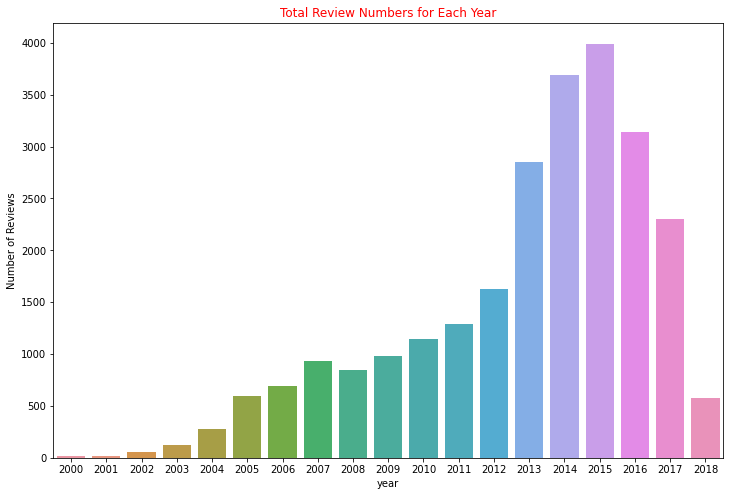

2015    3993
2014    3695
2016    3138
2013    2853
2017    2307
2012    1626
2011    1292
2010    1150
2009     978
2007     935
2008     851
2006     697
2005     597
2018     578
2004     274
2003     124
2002      60
2001      20
2000      20
Name: year, dtype: int64

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(df['year'])
plt.title('Total Review Numbers for Each Year', color='r')
plt.xlabel('year')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['year'].value_counts()

In [ ]:
print('Number of unique customers: {}'.format(len(df['reviewerID'].unique())))

Number of unique customers: 23251


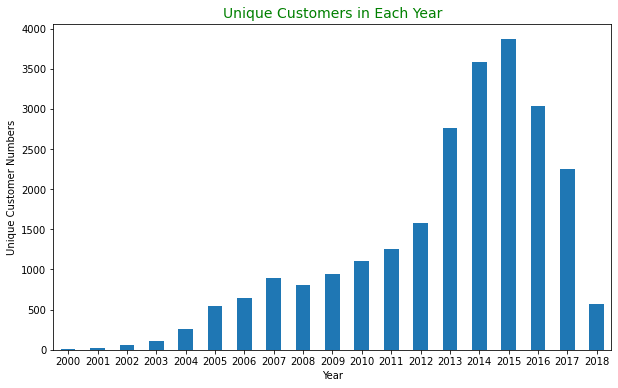

year
2000      16
2001      19
2002      58
2003     114
2004     254
2005     548
2006     650
2007     893
2008     812
2009     939
2010    1110
2011    1252
2012    1574
2013    2756
2014    3580
2015    3868
2016    3042
2017    2252
2018     573
Name: reviewerID, dtype: int64


In [ ]:
# How many unique customers in each year?
unique_cust = df.groupby('year')['reviewerID'].nunique()

# Plot unique customer numbers in each year
plt.figure(figsize = (10,6))
unique_cust.plot(kind='bar', rot = 0)
plt.title('Unique Customers in Each Year', color='g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Customer Numbers')
plt.show()

# Print unique customer numbers in each year
print(unique_cust)

In [ ]:
# unique customers for each "rating class"
a = list(df.groupby(['rating_class'])['reviewerID'].unique())  

# number of customers
a2 = [len(a[0]),len(a[1])] 

# number of reviews for each "rating class"
b = list(df['rating_class'].value_counts())              

uniq_cust_rate = pd.DataFrame({'rating_class': ['bad', 'good'],
                               'number_of_customers': a2,
                               'number_of_reviews': sorted(b)})
print(uniq_cust_rate)

  rating_class  number_of_customers  number_of_reviews
0          bad                 2842               2906
1         good                20770              22282


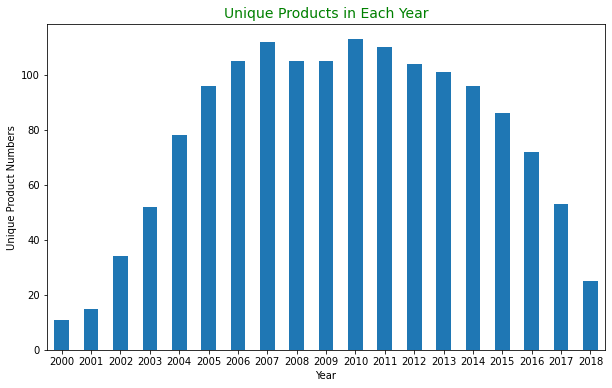

year
2000     11
2001     15
2002     34
2003     52
2004     78
2005     96
2006    105
2007    112
2008    105
2009    105
2010    113
2011    110
2012    104
2013    101
2014     96
2015     86
2016     72
2017     53
2018     25
Name: asin, dtype: int64


In [ ]:
# How many unique products in each year?
unique_prod = df.groupby('year')['asin'].nunique()

# Plot unique product numbers in each year
plt.figure(figsize = (10,6))
unique_prod.plot(kind='bar',rot =0)
plt.title('Unique Products in Each Year', color = 'g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Product Numbers')
plt.show()

# Print unique product numbers in each year
print(unique_prod)

In [ ]:
df['rating_class_num'] = df['rating_class'].map({'good': 1, 'bad': 0})
    
feature = df.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                       '% of Relevant Rating Number in This Year'] 
feature['% of Relevant Rating in the Total'] = (feature['Relevant Rating Number'] / 22425)*100
        
feature

,Year,Total Reviews,Relevant Rating Number,% of Relevant Rating Number in This Year,% of Relevant Rating in the Total
0,2000,20,18,90.000000,0.080268
1,2001,20,16,80.000000,0.071349
2,2002,60,47,78.333333,0.209588
3,2003,124,108,87.096774,0.481605
4,2004,274,217,79.197080,0.967670
5,2005,597,484,81.072027,2.158305
6,2006,697,583,83.644189,2.599777
7,2007,935,807,86.310160,3.598662
8,2008,851,743,87.309048,3.313266
9,2009,978,842,86.094070,3.754738


In [ ]:
# Function for creating a column token
def token (text):
    token = [w for w in nltk.word_tokenize(text)]
    return token

# To create token feature
df['token'] = df['clean_text'].astype(str).apply(token)

In [ ]:
# Function for creating a column to see the length of the review text
def length(text):
    length = len([w for w in nltk.word_tokenize(text)])
    return length

# Apply length function to create review length feature
df['review_length'] = df['review_text'].apply(length)
df.head(3)

,Rating,verified,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,also_buy,...,similar_item,date,price,review_text,rating_class,clean_text,year,rating_class_num,token,review_length
0,5,True,A38RQFVQ1AKJQQ,4126895493,George Walker,1424563200,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$7.99,Five Stars Great headphones. It's just the cor...,good,five star great headphones cord short,2015,1,"[five, star, great, headphones, cord, short]",14
1,5,True,A299MRB9O6GWDE,4126895493,Carolyn B,1494201600,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$7.99,Officewear Really like these headphone. Wante...,good,officewear really like headphone want somethin...,2017,1,"[officewear, really, like, headphone, want, so...",47
2,1,True,A3ACFC6DQQLIQT,4126895493,MK,1478304000,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$7.99,For the money they are fine. Just hope they ho...,bad,money fine hope hold wire headphone break less...,2016,0,"[money, fine, hope, hold, wire, headphone, bre...",29


In [ ]:
df['review_length_bin'] = pd.cut(df['review_length'], np.arange(0,4800,100))
df.head()

,Rating,verified,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,also_buy,...,date,price,review_text,rating_class,clean_text,year,rating_class_num,token,review_length,review_length_bin
0,5,True,A38RQFVQ1AKJQQ,4126895493,George Walker,1424563200,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,NaN,$7.99,Five Stars Great headphones. It's just the cor...,good,five star great headphones cord short,2015,1,"[five, star, great, headphones, cord, short]",14,"(0, 100]"
1,5,True,A299MRB9O6GWDE,4126895493,Carolyn B,1494201600,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,NaN,$7.99,Officewear Really like these headphone. Wante...,good,officewear really like headphone want somethin...,2017,1,"[officewear, really, like, headphone, want, so...",47,"(0, 100]"
2,1,True,A3ACFC6DQQLIQT,4126895493,MK,1478304000,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,NaN,$7.99,For the money they are fine. Just hope they ho...,bad,money fine hope hold wire headphone break less...,2016,0,"[money, fine, hope, hold, wire, headphone, bre...",29,"(0, 100]"
3,3,True,A36BC0YFDBNB5X,4126895493,bigboy,1474675200,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,NaN,$7.99,Three Stars Very good,good,three star good,2016,1,"[three, star, good]",4,"(0, 100]"
4,1,True,A212PQ0HQPNNWM,4126895493,Kelly Hales,1468713600,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,NaN,$7.99,Currently returning this product because the s...,bad,currently return product sound not come curren...,2016,0,"[currently, return, product, sound, not, come,...",48,"(0, 100]"


In [ ]:
df3 = df.drop(df[(df['review_length'] > 150) & (df['rating_class'] == 'good')].index)

In [ ]:
df4 = df3.drop(df3[(df3['year'] < 2010)].index)
df4=df4.head(15000)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 21482
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rating             15000 non-null  int64   
 1   verified           15000 non-null  bool    
 2   reviewerID         15000 non-null  object  
 3   asin               15000 non-null  object  
 4   reviewerName       14999 non-null  object  
 5   unixReviewTime     15000 non-null  int64   
 6   category           15000 non-null  object  
 7   description        15000 non-null  object  
 8   title              15000 non-null  object  
 9   also_buy           15000 non-null  object  
 10  brand              15000 non-null  object  
 11  feature            15000 non-null  object  
 12  rank               15000 non-null  object  
 13  also_view          15000 non-null  object  
 14  main_cat           15000 non-null  object  
 15  similar_item       13899 non-null  object  
 16  date

In [ ]:
df4.shape

(15000, 26)

In [ ]:
# Create a new data frame with clean text and rating class number
df5 = df4[["clean_text", "rating_class_num"]].reset_index()
df5.head(10)


,index,clean_text,rating_class_num
0,0,five star great headphones cord short,1
1,1,officewear really like headphone want somethin...,1
2,2,money fine hope hold wire headphone break less...,0
3,3,three star good,1
4,4,currently return product sound not come curren...,0
5,5,one star not good quality,0
6,6,fragile headphones work perfectly fine hear on...,0
7,7,buy car kid buy car kid cord little shorter he...,1
8,8,one star garbage,0
9,9,one star receive break,0


In [ ]:
df4.to_csv('C:\Sem7\Final Year Project\DATASETS\Reduced_Cleaned_Reviews_electronics_headphones.csv', sep=',', encoding='utf-8', index = False)


In [ ]:
df5=df5.dropna(subset=['clean_text'])

In [ ]:
 df5.isna().sum()

index               0
clean_text          0
rating_class_num    0
dtype: int64

In [ ]:
countVec = CountVectorizer(ngram_range=(1, 2),binary=True)

In [ ]:
countVec.fit(df5["clean_text"])

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
transformed_matrix = countVec.transform(df5["clean_text"])

In [ ]:
transformed_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
df6 = pd.DataFrame(transformed_matrix.toarray(), columns=names)


MemoryError: Unable to allocate 19.1 GiB for an array with shape (14997, 171304) and data type int64